In [1]:
import numpy as np
import pandas as pd

In [7]:
dataFrame = pd.read_csv('../Hyperparameter_tuning/diabetes_clean.csv')
X = dataFrame.drop('diabetes', axis=1).values
y = dataFrame.diabetes.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=2000)

logreg.fit(X_train, y_train)




LogisticRegression(max_iter=2000)

In [3]:
#Predicted probabilities using Logistic Regression
y_pred_probs = logreg.predict_proba(X_test)[:,1]#Predicted probability for the positive label

print(y_pred_probs[:5])



[0.6761165  0.20098398 0.08263796 0.11437993 0.1415837 ]


### ROC(Receiver Operating Characteristic) Curve 


##### Takes in the label test set and predicted probabilities as arguments. Returns a list containing the false positive rate, the true positive rate and the logistic regression threshold

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
print(fpr,tpr,thresholds)

[0.         0.00833333 0.00833333 0.01666667 0.01666667 0.03333333
 0.03333333 0.04166667 0.04166667 0.05       0.05       0.05833333
 0.05833333 0.075      0.075      0.08333333 0.08333333 0.10833333
 0.10833333 0.11666667 0.11666667 0.125      0.125      0.13333333
 0.13333333 0.15       0.15       0.15833333 0.15833333 0.16666667
 0.16666667 0.175      0.175      0.20833333 0.20833333 0.225
 0.225      0.25833333 0.25833333 0.26666667 0.26666667 0.30833333
 0.30833333 0.31666667 0.31666667 0.375      0.375      0.425
 0.425      0.50833333 0.50833333 0.53333333 0.53333333 0.54166667
 0.54166667 0.55833333 0.55833333 0.6        0.6        0.63333333
 0.63333333 0.64166667 0.64166667 0.68333333 0.68333333 0.71666667
 0.71666667 0.76666667 0.76666667 0.825      0.825      1.        ] [0.         0.         0.01388889 0.01388889 0.15277778 0.15277778
 0.19444444 0.19444444 0.20833333 0.20833333 0.23611111 0.23611111
 0.26388889 0.26388889 0.36111111 0.36111111 0.375      0.375
 0.430555

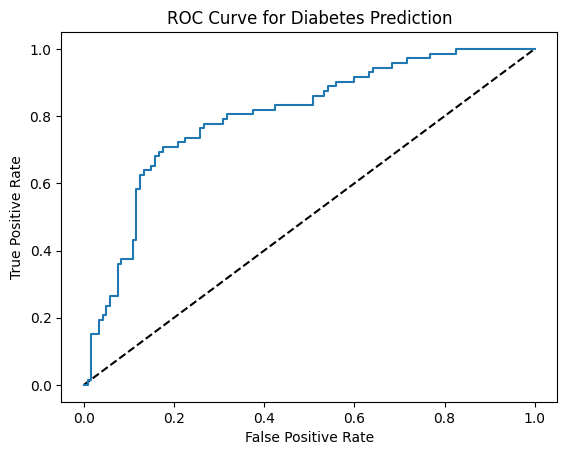

In [5]:
import matplotlib.pyplot as plt

plt.plot([0,1],[0,1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [6]:
#Calculating the ROC AUC score
print(roc_auc_score(y_test, y_pred_probs))


#Calculating the confusion matrix
y_pred  = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))

#Calculating the classification report
print(classification_report(y_test, y_pred))

0.8009259259259259
[[106  14]
 [ 30  42]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       120
           1       0.75      0.58      0.66        72

    accuracy                           0.77       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192

